In [8]:
# Importing necessary libraries 
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
  
# Loading the iris dataset 
iris = datasets.load_iris() 
  
# x -> features, y -> label 
x = iris.data 
y = iris.target 
  
# Dividing x, y into train and test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) 

# Feature scaling: standardize data
sc = StandardScaler().fit(x_train)
x_std_train = sc.transform(x_train)
x_std_test = sc.transform(x_test)

# Training SVM classifier 
modelSVC = SVC()
modelSVC.fit(x_std_train, y_train) 
  
# model accuracy for X_test   
accuracy = modelSVC.score(x_std_test, y_test)
accuracy

0.9736842105263158

In [479]:
y_pred = modelSVC.predict(x_std_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6  0  0]
 [ 0 11  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [9]:
from sklearn.decomposition import PCA

### reduce dimension with PCA ----------------------------------------------------------
#choose 3 components
sklearn_pca = PCA(n_components=3)
x_train_pca = sklearn_pca.fit_transform(x_std_train) 
x_test_pca = sklearn_pca.transform(x_std_test)
### ------------------------------------------------------------------------------------

# Training SVM classifier with PCA
modelSVMPCA = SVC()
modelSVMPCA.fit(x_train_pca, y_train)

# find the score using reduced dimensions keeping the same amount of samples, to compare accuracy.
score=modelSVMPCA.score(x_test_pca,y_test)
print("Accuracy: ",score)

Accuracy:  0.9736842105263158


C:\Users\wilbert osmond\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [483]:
y_pred_pca = modelSVMPCA.predict(x_test_pca)
print(confusion_matrix(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

[[ 6  0  0]
 [ 0 11  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [491]:
x_train_pca

array([[ 1.47169466,  1.11150676,  0.8753308 ],
       [-2.13874679,  0.46205556, -0.12022836],
       [-2.0687003 , -0.74062156, -0.20635113],
       [-1.6989035 ,  0.42747991, -0.28790358],
       [ 1.2968531 , -0.59693671,  0.50135434],
       [ 0.75459196, -1.66028395, -0.78869381],
       [-2.11071772,  0.98040323, -0.17995133],
       [-2.32465659,  0.01556118,  0.36237566],
       [-2.2009426 ,  0.10782167,  0.12151702],
       [ 0.22917583, -0.11670073,  0.12244128],
       [ 1.24881383,  0.97991585, -0.75427218],
       [ 1.75309543, -0.29405655, -0.03115702],
       [-1.92650752,  0.22990718,  0.09243669],
       [-2.03844218,  0.25553543, -0.16645241],
       [ 2.90261855,  0.97598963, -0.6715637 ],
       [ 0.3197239 , -0.71622232, -0.3076906 ],
       [-2.27134464,  0.62057986,  0.02922342],
       [-2.6630005 ,  0.41369133,  0.35527933],
       [ 1.21071846, -0.5307701 ,  0.08312057],
       [-2.04083283,  0.51377769, -0.20174233],
       [ 1.50326448,  0.45271318, -0.325

In [10]:
## PC 1
PC1_train = x_train_pca[:,[0]]
PC1_test = x_test_pca[:,[0]]

## PC 2
PC2_train = x_train_pca[:,[1]]
PC2_test = x_test_pca[:,[1]]

## PC 3
PC3_train = x_train_pca[:,[2]]
PC3_test = x_test_pca[:,[2]]

In [509]:
modelSVMPC1 = SVC()
modelSVMPC1.fit(PC1_train, y_train)
y_pred_pca = modelSVMPC1.predict(PC1_test)
print(confusion_matrix(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

[[ 6  0  0]
 [ 0  9  2]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.90      0.82      0.86        11
           2       0.86      0.92      0.89        13

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.92        30
weighted avg       0.90      0.90      0.90        30



In [498]:
modelSVMPC2 = SVC()
modelSVMPC2.fit(PC2_train, y_train)
y_pred_pc2 = modelSVMPC2.predict(PC2_test)
print(confusion_matrix(y_test, y_pred_pc2))
print(classification_report(y_test, y_pred_pc2))

[[ 4  2  0]
 [ 8  3  0]
 [12  1  0]]
              precision    recall  f1-score   support

           0       0.17      0.67      0.27         6
           1       0.50      0.27      0.35        11
           2       0.00      0.00      0.00        13

    accuracy                           0.23        30
   macro avg       0.22      0.31      0.21        30
weighted avg       0.22      0.23      0.18        30



In [504]:
modelSVMPC3 = SVC()
modelSVMPC3.fit(PC3_train, y_train)
y_pred_pc3 = modelSVMPC3.predict(PC3_test)
print(confusion_matrix(y_test, y_pred_pc3))
print(classification_report(y_test, y_pred_pc3))

[[6 0 0]
 [7 4 0]
 [7 4 2]]
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         6
           1       0.50      0.36      0.42        11
           2       1.00      0.15      0.27        13

    accuracy                           0.40        30
   macro avg       0.60      0.51      0.38        30
weighted avg       0.68      0.40      0.36        30



In [19]:
## PC 1 & 2
PC12_train = x_train_pca[:,[0,1]]
PC12_test = x_test_pca[:,[0,1]]
modelSVMPC12 = SVC()
modelSVMPC12.fit(PC12_train, y_train)
y_pred_pc12 = modelSVMPC12.predict(PC12_test)
print(confusion_matrix(y_test, y_pred_pc12))
print(classification_report(y_test, y_pred_pc12))

C:\Users\wilbert osmond\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
## PC 1 & 3
PC13_train = x_train_pca[:,[0,2]]
PC13_test = x_test_pca[:,[0,2]]
modelSVMPC13 = SVC()
modelSVMPC13.fit(PC13_train, y_train)
y_pred_pc13 = modelSVMPC13.predict(PC13_test)
print(confusion_matrix(y_test, y_pred_pc13))
print(classification_report(y_test, y_pred_pc13))

C:\Users\wilbert osmond\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [25]:
## PC 2 & 3
PC23_train = x_train_pca[:,[1,2]]
PC23_test = x_test_pca[:,[1,2]]
modelSVMPC23 = SVC()
modelSVMPC23.fit(PC23_train, y_train)
y_pred_pc23 = modelSVMPC23.predict(PC23_test)
print(confusion_matrix(y_test, y_pred_pc23))
print(classification_report(y_test, y_pred_pc23))

C:\Users\wilbert osmond\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
############################################################################################################################

In [243]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

iris = datasets.load_iris()
x = iris.data
y = iris.target
x, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

sc = StandardScaler().fit(x_train)
X_std_train = sc.transform(x_train)


# We center the data and compute the sample covariance matrix.
cov_matrix = np.cov(X_std_train, rowvar=False)
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print("Eigenvector: ", eigenvector)
    print("Eigenvalue: ", eigenvalue)

Eigenvector:  [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
Eigenvalue:  4.228241706034867
Eigenvector:  [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
Eigenvalue:  0.24267074792863363
Eigenvector:  [-0.58202985  0.59791083  0.07623608  0.54583143]
Eigenvalue:  0.07820950004291946
Eigenvector:  [-0.31548719  0.3197231   0.47983899 -0.75365743]
Eigenvalue:  0.023835092973449427


In [193]:
cov_matrix

array([[ 1.00900901, -0.05530491,  0.89480726,  0.84637519],
       [-0.05530491,  1.00900901, -0.35968362, -0.30334713],
       [ 0.89480726, -0.35968362,  1.00900901,  0.97612557],
       [ 0.84637519, -0.30334713,  0.97612557,  1.00900901]])

In [195]:
cov_matrix = np.cov(X_std_train.T)
eigval, eigvec = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %eigvec)
print('Eigenvalues \n%s' %eigval)

Eigenvectors 
[[ 0.53429768 -0.33124095 -0.7291978   0.27032571]
 [-0.2166997  -0.94253335  0.22651471 -0.11559931]
 [ 0.58431023 -0.00413573  0.13325399 -0.80050474]
 [ 0.57109438 -0.04351097  0.63182674  0.52225758]]
Eigenvalues 
[2.91466896 0.9739909  0.12931391 0.01806226]


References:
https://stackoverflow.com/questions/32194967/how-to-do-pca-and-svm-for-classification-in-python
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
http://scikit-learn.org/stable/modules/cross_validation.html

AttributeError: 'Axes3D' object has no attribute 'show'

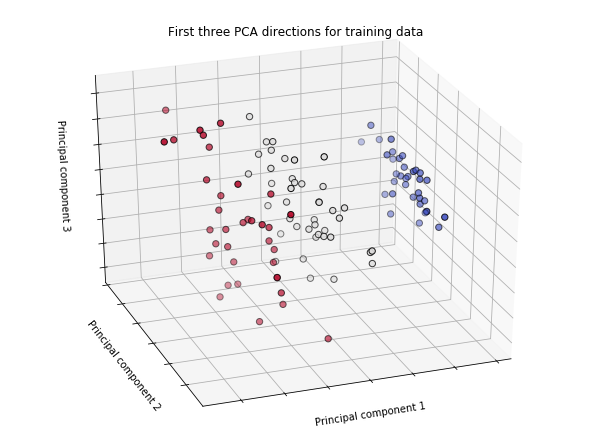

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(x_train_pca[:, 0], x_train_pca[:, 1], x_train_pca[:, 2], c=y_train,
           cmap=plt.cm.coolwarm, edgecolor='k', s=40)
ax.set_title("First three PCA directions for training data")
ax.set_xlabel("Principal component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Principal component 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Principal component 3")
ax.w_zaxis.set_ticklabels([])
ax.show()

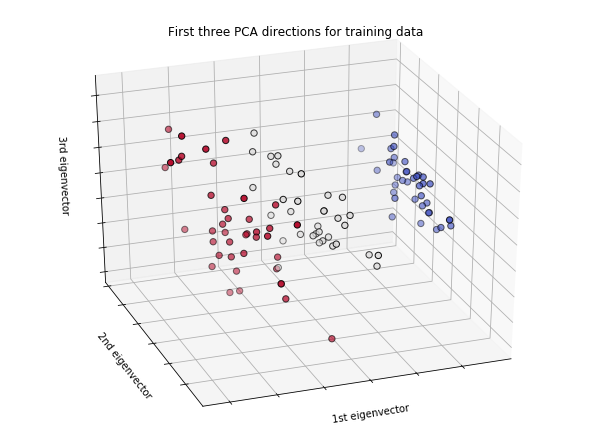

In [344]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(x_train_pca[:, 0], x_train_pca[:, 1], x_train_pca[:, 2], c=y_train,
           cmap=plt.cm.coolwarm, edgecolor='k', s=40)
ax.set_title("First three PCA directions for training data")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

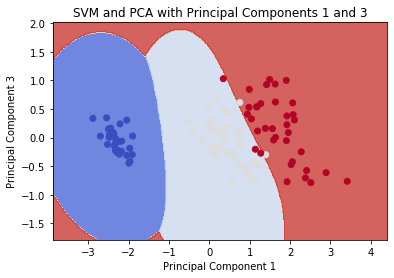

In [26]:
import numpy as np

# Visualizing the modeled svm classifiers with Iris Sepal features
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 2].min() - 1, x_train_pca[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]*[y_min, y_max]
Z = modelSVMPC13.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 2], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('SVM and PCA with Principal Components 1 and 3')

plt.show()

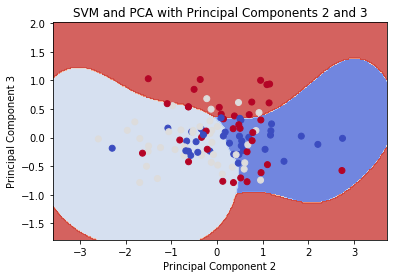

In [27]:
import numpy as np

# Visualizing the modeled svm classifiers with Iris Sepal features
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
y_min, y_max = x_train_pca[:, 2].min() - 1, x_train_pca[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]*[y_min, y_max]
Z = modelSVMPC23.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(x_train_pca[:, 1], x_train_pca[:, 2], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('SVM and PCA with Principal Components 2 and 3')

plt.show()

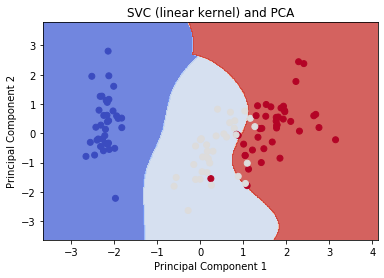

In [411]:
# Visualizing the modeled svm classifiers with Iris Sepal features
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]*[y_min, y_max]
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVC (linear kernel) and PCA')

plt.show()